In [2]:
from tensorflow import keras
import tensorflow, sklearn, matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score

In [3]:
print(tensorflow.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)
print(cv2.__version__)

2.11.0
1.2.0
3.6.2
4.7.0


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('Shape of Train data: ')
print(x_train.shape, y_train.shape)
print('Shape of Test data: ')
print(x_test.shape, y_test.shape)

Shape of Train data: 
(50000, 32, 32, 3) (50000, 1)
Shape of Test data: 
(10000, 32, 32, 3) (10000, 1)


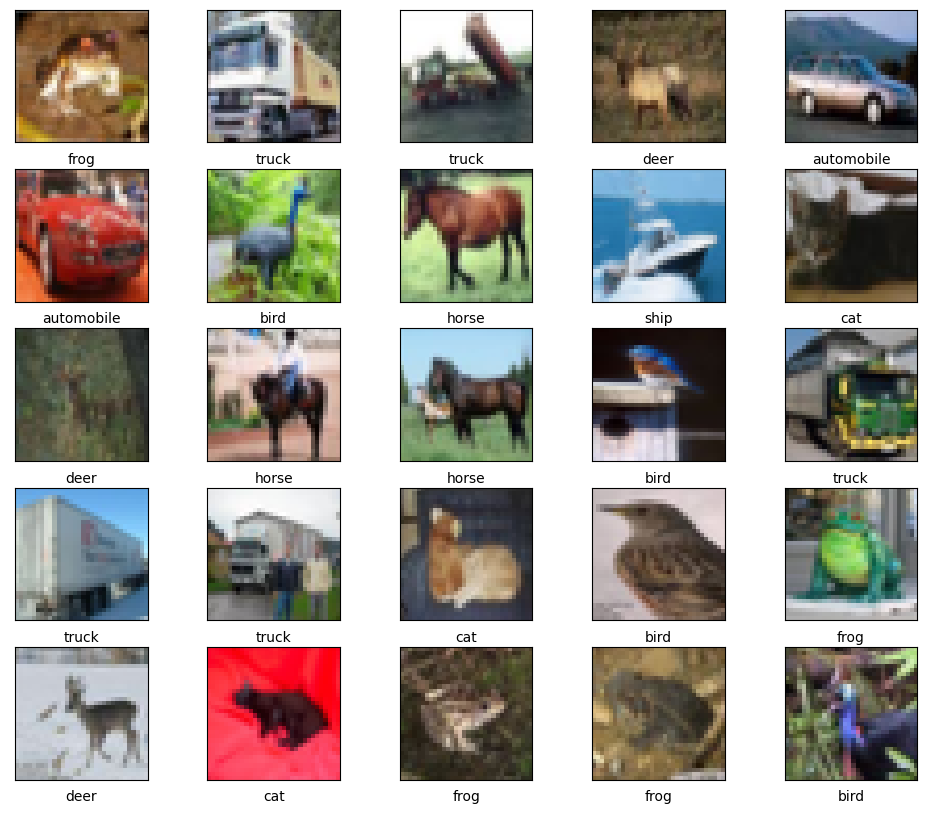

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## 32 X 32 dimension of image
 - This means that there are 32 X 32 = 1024 pixels in the image
 - Also think like 32 rows and 32 columns

## Normalization

- Why? --> To get all the data points in a similar range

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

## sklearn doesn't take 3 dimensional inputs

 - Hence flattening 3 dimensional input into 2 dimensional arrays

In [7]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
n_smpl, nx, ny, n_rgb = x_train.shape
x_train2 = x_train.reshape((n_smpl, nx*ny*n_rgb)) # converting 50000, 32, 32, 3 into 50000,3072 --> 32*32*3 = 3072
n_smpl, nx, ny, n_rgb = x_test.shape
x_test2 = x_test.reshape((n_smpl, nx*ny*n_rgb))

In [9]:
print('new 2 dimensional train and test set: ')
print(x_train2.shape, x_test2.shape)

new 2 dimensional train and test set: 
(50000, 3072) (10000, 3072)


## RandomForestClassifier modelling

In [10]:
rand_cls = RandomForestClassifier()
rand_cls.fit(x_train2, y_train)

/var/folders/hs/0zv3m4r94rxc4xfktmvc3m300000gn/T/ipykernel_38731/1352087451.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_cls.fit(x_train2, y_train)


RandomForestClassifier()

In [11]:
y_pred = rand_cls.predict(x_test2)

## Model evaluation

In [12]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.4656
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1042
           1       0.55      0.52      0.54      1051
           2       0.32      0.37      0.34       873
           3       0.28      0.34      0.31       828
           4       0.40      0.39      0.40      1028
           5       0.38      0.42      0.40       906
           6       0.54      0.46      0.49      1190
           7       0.46      0.52      0.49       872
           8       0.61      0.58      0.60      1067
           9       0.55      0.48      0.51      1143

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



## *Random Forest classifier only gave a 47% of accuracy which is really bad*

## Testing the above model using custom image to see how RandomForestClassifier is gonna do

In [14]:
img_path = '/Users/rishinigam/online_teaching_freelance/docker_proj/bird.jpeg'
img_ = cv2.imread(img_path)
print('before resizing: {}'.format(img_.shape))
img_ = cv2.resize(img_, (32,32))
print('updated to 32X32 shape: ',img_.shape)

before resizing: (742, 1200, 3)
updated to 32X32 shape:  (32, 32, 3)


In [15]:
# flattening the image to fit 2-dimensional array for the model
nx, ny, n_rgb = img_.shape
print('ndim (before): ',img_.ndim)
img_2 = img_.reshape(1, (nx*ny*n_rgb))
print(img_2.shape)
print('ndim: ', img_2.ndim)

ndim (before):  3
(1, 3072)
ndim:  2


In [16]:
# defining the classes list
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
ans = rand_cls.predict(img_2)
print(ans)
print(classes[ans[0]])

[2]
bird


In [19]:
def predict(model_name,img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32,32))
    nx, ny, n_rgb = img.shape
    img_2 = img.reshape(1, (nx*ny*n_rgb))
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    ans = rand_cls.predict(img_2)
    return classes[ans[0]]

clss_name = predict(rand_cls, '/Users/rishinigam/online_teaching_freelance/docker_proj/bird.jpeg')
print(clss_name)


bird
